# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [19]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [20]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [21]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [22]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [65]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

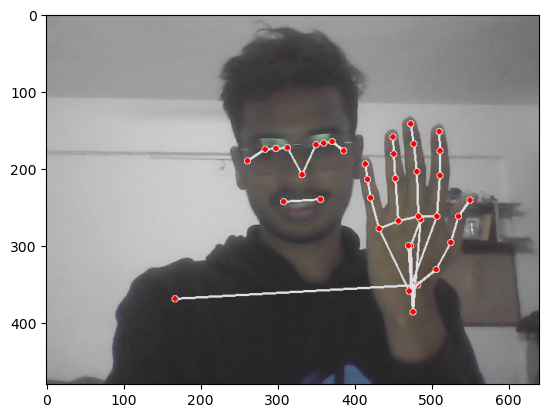

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [66]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [28]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [24]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [25]:
result_test

NameError: name 'result_test' is not defined

In [26]:
np.save('0', result_test)

NameError: name 'result_test' is not defined

In [27]:
np.load('0.npy')

array([ 0.49718934,  0.65821254, -1.45800102, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [29]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])  

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                print(npy_path)
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

MP_Data\hello\0\0
MP_Data\hello\0\1
MP_Data\hello\0\2
MP_Data\hello\0\3
MP_Data\hello\0\4
MP_Data\hello\0\5
MP_Data\hello\0\6
MP_Data\hello\0\7
MP_Data\hello\0\8
MP_Data\hello\0\9
MP_Data\hello\0\10
MP_Data\hello\0\11
MP_Data\hello\0\12
MP_Data\hello\0\13
MP_Data\hello\0\14
MP_Data\hello\0\15
MP_Data\hello\0\16
MP_Data\hello\0\17
MP_Data\hello\0\18
MP_Data\hello\0\19
MP_Data\hello\0\20
MP_Data\hello\0\21
MP_Data\hello\0\22
MP_Data\hello\0\23
MP_Data\hello\0\24
MP_Data\hello\0\25
MP_Data\hello\0\26
MP_Data\hello\0\27
MP_Data\hello\0\28
MP_Data\hello\0\29
MP_Data\hello\1\0
MP_Data\hello\1\1
MP_Data\hello\1\2
MP_Data\hello\1\3
MP_Data\hello\1\4
MP_Data\hello\1\5
MP_Data\hello\1\6
MP_Data\hello\1\7
MP_Data\hello\1\8
MP_Data\hello\1\9
MP_Data\hello\1\10
MP_Data\hello\1\11
MP_Data\hello\1\12
MP_Data\hello\1\13
MP_Data\hello\1\14
MP_Data\hello\1\15
MP_Data\hello\1\16
MP_Data\hello\1\17
MP_Data\hello\1\18
MP_Data\hello\1\19
MP_Data\hello\1\20
MP_Data\hello\1\21
MP_Data\hello\1\22
MP_Data\hello

MP_Data\hello\14\13
MP_Data\hello\14\14
MP_Data\hello\14\15
MP_Data\hello\14\16
MP_Data\hello\14\17
MP_Data\hello\14\18
MP_Data\hello\14\19
MP_Data\hello\14\20
MP_Data\hello\14\21
MP_Data\hello\14\22
MP_Data\hello\14\23
MP_Data\hello\14\24
MP_Data\hello\14\25
MP_Data\hello\14\26
MP_Data\hello\14\27
MP_Data\hello\14\28
MP_Data\hello\14\29
MP_Data\hello\15\0
MP_Data\hello\15\1
MP_Data\hello\15\2
MP_Data\hello\15\3
MP_Data\hello\15\4
MP_Data\hello\15\5
MP_Data\hello\15\6
MP_Data\hello\15\7
MP_Data\hello\15\8
MP_Data\hello\15\9
MP_Data\hello\15\10
MP_Data\hello\15\11
MP_Data\hello\15\12
MP_Data\hello\15\13
MP_Data\hello\15\14
MP_Data\hello\15\15
MP_Data\hello\15\16
MP_Data\hello\15\17
MP_Data\hello\15\18
MP_Data\hello\15\19
MP_Data\hello\15\20
MP_Data\hello\15\21
MP_Data\hello\15\22
MP_Data\hello\15\23
MP_Data\hello\15\24
MP_Data\hello\15\25
MP_Data\hello\15\26
MP_Data\hello\15\27
MP_Data\hello\15\28
MP_Data\hello\15\29
MP_Data\hello\16\0
MP_Data\hello\16\1
MP_Data\hello\16\2
MP_Data\hello

MP_Data\hello\28\10
MP_Data\hello\28\11
MP_Data\hello\28\12
MP_Data\hello\28\13
MP_Data\hello\28\14
MP_Data\hello\28\15
MP_Data\hello\28\16
MP_Data\hello\28\17
MP_Data\hello\28\18
MP_Data\hello\28\19
MP_Data\hello\28\20
MP_Data\hello\28\21
MP_Data\hello\28\22
MP_Data\hello\28\23
MP_Data\hello\28\24
MP_Data\hello\28\25
MP_Data\hello\28\26
MP_Data\hello\28\27
MP_Data\hello\28\28
MP_Data\hello\28\29
MP_Data\hello\29\0
MP_Data\hello\29\1
MP_Data\hello\29\2
MP_Data\hello\29\3
MP_Data\hello\29\4
MP_Data\hello\29\5
MP_Data\hello\29\6
MP_Data\hello\29\7
MP_Data\hello\29\8
MP_Data\hello\29\9
MP_Data\hello\29\10
MP_Data\hello\29\11
MP_Data\hello\29\12
MP_Data\hello\29\13
MP_Data\hello\29\14
MP_Data\hello\29\15
MP_Data\hello\29\16
MP_Data\hello\29\17
MP_Data\hello\29\18
MP_Data\hello\29\19
MP_Data\hello\29\20
MP_Data\hello\29\21
MP_Data\hello\29\22
MP_Data\hello\29\23
MP_Data\hello\29\24
MP_Data\hello\29\25
MP_Data\hello\29\26
MP_Data\hello\29\27
MP_Data\hello\29\28
MP_Data\hello\29\29
MP_Data\th

MP_Data\thanks\12\4
MP_Data\thanks\12\5
MP_Data\thanks\12\6
MP_Data\thanks\12\7
MP_Data\thanks\12\8
MP_Data\thanks\12\9
MP_Data\thanks\12\10
MP_Data\thanks\12\11
MP_Data\thanks\12\12
MP_Data\thanks\12\13
MP_Data\thanks\12\14
MP_Data\thanks\12\15
MP_Data\thanks\12\16
MP_Data\thanks\12\17
MP_Data\thanks\12\18
MP_Data\thanks\12\19
MP_Data\thanks\12\20
MP_Data\thanks\12\21
MP_Data\thanks\12\22
MP_Data\thanks\12\23
MP_Data\thanks\12\24
MP_Data\thanks\12\25
MP_Data\thanks\12\26
MP_Data\thanks\12\27
MP_Data\thanks\12\28
MP_Data\thanks\12\29
MP_Data\thanks\13\0
MP_Data\thanks\13\1
MP_Data\thanks\13\2
MP_Data\thanks\13\3
MP_Data\thanks\13\4
MP_Data\thanks\13\5
MP_Data\thanks\13\6
MP_Data\thanks\13\7
MP_Data\thanks\13\8
MP_Data\thanks\13\9
MP_Data\thanks\13\10
MP_Data\thanks\13\11
MP_Data\thanks\13\12
MP_Data\thanks\13\13
MP_Data\thanks\13\14
MP_Data\thanks\13\15
MP_Data\thanks\13\16
MP_Data\thanks\13\17
MP_Data\thanks\13\18
MP_Data\thanks\13\19
MP_Data\thanks\13\20
MP_Data\thanks\13\21
MP_Data\

MP_Data\thanks\25\13
MP_Data\thanks\25\14
MP_Data\thanks\25\15
MP_Data\thanks\25\16
MP_Data\thanks\25\17
MP_Data\thanks\25\18
MP_Data\thanks\25\19
MP_Data\thanks\25\20
MP_Data\thanks\25\21
MP_Data\thanks\25\22
MP_Data\thanks\25\23
MP_Data\thanks\25\24
MP_Data\thanks\25\25
MP_Data\thanks\25\26
MP_Data\thanks\25\27
MP_Data\thanks\25\28
MP_Data\thanks\25\29
MP_Data\thanks\26\0
MP_Data\thanks\26\1
MP_Data\thanks\26\2
MP_Data\thanks\26\3
MP_Data\thanks\26\4
MP_Data\thanks\26\5
MP_Data\thanks\26\6
MP_Data\thanks\26\7
MP_Data\thanks\26\8
MP_Data\thanks\26\9
MP_Data\thanks\26\10
MP_Data\thanks\26\11
MP_Data\thanks\26\12
MP_Data\thanks\26\13
MP_Data\thanks\26\14
MP_Data\thanks\26\15
MP_Data\thanks\26\16
MP_Data\thanks\26\17
MP_Data\thanks\26\18
MP_Data\thanks\26\19
MP_Data\thanks\26\20
MP_Data\thanks\26\21
MP_Data\thanks\26\22
MP_Data\thanks\26\23
MP_Data\thanks\26\24
MP_Data\thanks\26\25
MP_Data\thanks\26\26
MP_Data\thanks\26\27
MP_Data\thanks\26\28
MP_Data\thanks\26\29
MP_Data\thanks\27\0
MP_

MP_Data\iloveyou\8\10
MP_Data\iloveyou\8\11
MP_Data\iloveyou\8\12
MP_Data\iloveyou\8\13
MP_Data\iloveyou\8\14
MP_Data\iloveyou\8\15
MP_Data\iloveyou\8\16
MP_Data\iloveyou\8\17
MP_Data\iloveyou\8\18
MP_Data\iloveyou\8\19
MP_Data\iloveyou\8\20
MP_Data\iloveyou\8\21
MP_Data\iloveyou\8\22
MP_Data\iloveyou\8\23
MP_Data\iloveyou\8\24
MP_Data\iloveyou\8\25
MP_Data\iloveyou\8\26
MP_Data\iloveyou\8\27
MP_Data\iloveyou\8\28
MP_Data\iloveyou\8\29
MP_Data\iloveyou\9\0
MP_Data\iloveyou\9\1
MP_Data\iloveyou\9\2
MP_Data\iloveyou\9\3
MP_Data\iloveyou\9\4
MP_Data\iloveyou\9\5
MP_Data\iloveyou\9\6
MP_Data\iloveyou\9\7
MP_Data\iloveyou\9\8
MP_Data\iloveyou\9\9
MP_Data\iloveyou\9\10
MP_Data\iloveyou\9\11
MP_Data\iloveyou\9\12
MP_Data\iloveyou\9\13
MP_Data\iloveyou\9\14
MP_Data\iloveyou\9\15
MP_Data\iloveyou\9\16
MP_Data\iloveyou\9\17
MP_Data\iloveyou\9\18
MP_Data\iloveyou\9\19
MP_Data\iloveyou\9\20
MP_Data\iloveyou\9\21
MP_Data\iloveyou\9\22
MP_Data\iloveyou\9\23
MP_Data\iloveyou\9\24
MP_Data\iloveyou\9\2

MP_Data\iloveyou\20\16
MP_Data\iloveyou\20\17
MP_Data\iloveyou\20\18
MP_Data\iloveyou\20\19
MP_Data\iloveyou\20\20
MP_Data\iloveyou\20\21
MP_Data\iloveyou\20\22
MP_Data\iloveyou\20\23
MP_Data\iloveyou\20\24
MP_Data\iloveyou\20\25
MP_Data\iloveyou\20\26
MP_Data\iloveyou\20\27
MP_Data\iloveyou\20\28
MP_Data\iloveyou\20\29
MP_Data\iloveyou\21\0
MP_Data\iloveyou\21\1
MP_Data\iloveyou\21\2
MP_Data\iloveyou\21\3
MP_Data\iloveyou\21\4
MP_Data\iloveyou\21\5
MP_Data\iloveyou\21\6
MP_Data\iloveyou\21\7
MP_Data\iloveyou\21\8
MP_Data\iloveyou\21\9
MP_Data\iloveyou\21\10
MP_Data\iloveyou\21\11
MP_Data\iloveyou\21\12
MP_Data\iloveyou\21\13
MP_Data\iloveyou\21\14
MP_Data\iloveyou\21\15
MP_Data\iloveyou\21\16
MP_Data\iloveyou\21\17
MP_Data\iloveyou\21\18
MP_Data\iloveyou\21\19
MP_Data\iloveyou\21\20
MP_Data\iloveyou\21\21
MP_Data\iloveyou\21\22
MP_Data\iloveyou\21\23
MP_Data\iloveyou\21\24
MP_Data\iloveyou\21\25
MP_Data\iloveyou\21\26
MP_Data\iloveyou\21\27
MP_Data\iloveyou\21\28
MP_Data\iloveyou\21\2

In [26]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [72]:
np.array(sequences).shape # very dangerous point 

(90, 30, 258)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 258)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [67]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback]) # 10 minutes

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - categorical_accuracy: 0.3091 - loss: 1.0748
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.3620 - loss: 0.9721
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.5206 - loss: 0.9207
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.6811 - loss: 0.9194
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.6477 - loss: 0.8682
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.6575 - loss: 0.7555
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.7515 - loss: 0.5099
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.7203 - loss: 0.8060
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.8159 - loss: 0.5350
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7241 - loss: 0.5583
Epoch 11/2000
3/3 ━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.5968 - loss: 0.6478
Epoch 63/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.5949 - loss: 1.0546
Epoch 64/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.6184 - loss: 2.3817
Epoch 65/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.6869 - loss: 2.7601
Epoch 66/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.6478 - loss: 2.2412
Epoch 67/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7652 - loss: 0.8305
Epoch 68/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.9061 - loss: 0.4808
Epoch 69/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.8806 - loss: 0.4421
Epoch 70/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8846 - loss: 0.4253
Epoch 71/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.9335 - loss: 0.3933
Epoch 72/2000
3/3 ━━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.9198 - loss: 0.2026
Epoch 124/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.9472 - loss: 0.1889
Epoch 125/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.9139 - loss: 0.1813
Epoch 126/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9159 - loss: 0.1868
Epoch 127/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9628 - loss: 0.1171
Epoch 128/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.8983 - loss: 0.1714
Epoch 129/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.9354 - loss: 0.1523
Epoch 130/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9804 - loss: 0.1057
Epoch 131/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.9530 - loss: 0.1095
Epoch 132/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.9648 - loss: 0.1100
Epoch 133/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 0.0279
Epoch 185/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 1.0000 - loss: 0.0343
Epoch 186/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.9902 - loss: 0.0288
Epoch 187/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 0.0287
Epoch 188/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 0.0217
Epoch 189/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 0.0233
Epoch 190/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 0.0207
Epoch 191/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 0.0114
Epoch 192/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 0.0194
Epoch 193/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 0.0102
Epoch 194/2000
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 0.0012
Epoch 246/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 7.4949e-04
Epoch 247/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 1.0000 - loss: 8.1948e-04
Epoch 248/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.2598e-04
Epoch 249/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 1.0000 - loss: 7.4773e-04
Epoch 250/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 1.0000 - loss: 7.5426e-04
Epoch 251/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 1.0000 - loss: 8.4425e-04
Epoch 252/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 7.1052e-04
Epoch 253/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 1.0000 - loss: 6.3220e-04
Epoch 254/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 1.0000 - loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.6890e-04
Epoch 305/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 3.5006e-04
Epoch 306/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.2608e-04
Epoch 307/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.4653e-04
Epoch 308/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.2498e-04
Epoch 309/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.2782e-04
Epoch 310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 1.0000 - loss: 2.5628e-04
Epoch 311/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 1.0000 - loss: 2.3418e-04
Epoch 312/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 2.2937e-04
Epoch 313/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.1419e-04
Epoch 364/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.6115e-04
Epoch 365/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0675e-04
Epoch 366/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 9.4219e-05
Epoch 367/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 1.0000 - loss: 1.2204e-04
Epoch 368/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.1479e-04
Epoch 369/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.4733e-04
Epoch 370/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.2322e-04
Epoch 371/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.0851e-04
Epoch 372/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 7.1462e-05
Epoch 423/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.4701e-05
Epoch 424/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 8.0948e-05
Epoch 425/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.2508e-05
Epoch 426/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.9032e-05
Epoch 427/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.9278e-05
Epoch 428/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.9116e-05
Epoch 429/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.6224e-05
Epoch 430/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 8.5165e-05
Epoch 431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 5.4713e-05
Epoch 482/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.0757e-05
Epoch 483/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 4.7382e-05
Epoch 484/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.4237e-05
Epoch 485/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.0222e-05
Epoch 486/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 4.1154e-05
Epoch 487/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 5.1071e-05
Epoch 488/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.6538e-05
Epoch 489/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.7396e-05
Epoch 490/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 2.7156e-05
Epoch 541/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 1.0000 - loss: 3.7611e-05
Epoch 542/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 3.9213e-05
Epoch 543/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 2.7898e-05
Epoch 544/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 1.0000 - loss: 3.2018e-05
Epoch 545/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 3.9541e-05
Epoch 546/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.6859e-05
Epoch 547/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 3.5737e-05
Epoch 548/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 2.6764e-05
Epoch 549/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.7655e-05
Epoch 600/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.7566e-05
Epoch 601/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8382e-05
Epoch 602/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.6167e-05
Epoch 603/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.1593e-05
Epoch 604/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.2527e-05
Epoch 605/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.3976e-05
Epoch 606/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 2.3219e-05
Epoch 607/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 1.0000 - loss: 2.7462e-05
Epoch 608/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.3568e-05
Epoch 659/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.9778e-05
Epoch 660/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8477e-05
Epoch 661/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.5328e-05
Epoch 662/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.2585e-05
Epoch 663/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 1.0000 - loss: 1.7546e-05
Epoch 664/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 1.6163e-05
Epoch 665/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.6061e-05
Epoch 666/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.9994e-05
Epoch 667/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 1.0000 - loss: 1.1736e-05
Epoch 718/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 1.3321e-05
Epoch 719/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 1.0000 - loss: 1.1307e-05
Epoch 720/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 1.0000 - loss: 1.3741e-05
Epoch 721/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 1.1651e-05
Epoch 722/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 1.0000 - loss: 1.2008e-05
Epoch 723/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 1.0000 - loss: 1.0660e-05
Epoch 724/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 1.3384e-05
Epoch 725/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.1818e-05
Epoch 726/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 1.0000 - loss: 1.1401e-05
Epoch 777/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 1.0000 - loss: 1.2853e-05
Epoch 778/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 1.4273e-05
Epoch 779/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 1.0043e-05
Epoch 780/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 8.7723e-06
Epoch 781/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 9.5089e-06
Epoch 782/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 1.1210e-05
Epoch 783/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.2463e-06
Epoch 784/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 1.0000 - loss: 7.9879e-06
Epoch 785/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 6.7996e-06
Epoch 836/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 1.0000 - loss: 9.7780e-06
Epoch 837/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 9.0873e-06
Epoch 838/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 6.6038e-06
Epoch 839/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 7.7812e-06
Epoch 840/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 7.9525e-06
Epoch 841/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0091e-05
Epoch 842/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 9.9597e-06
Epoch 843/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 6.0509e-06
Epoch 844/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.5612e-06
Epoch 895/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 7.2089e-06
Epoch 896/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.4634e-06
Epoch 897/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.5225e-06
Epoch 898/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.7798e-06
Epoch 899/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.1373e-06
Epoch 900/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.5128e-06
Epoch 901/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.4169e-06
Epoch 902/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 6.2587e-06
Epoch 903/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 5.6697e-06
Epoch 954/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.0722e-06
Epoch 955/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.2899e-06
Epoch 956/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.7972e-06
Epoch 957/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.6984e-06
Epoch 958/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.6108e-06
Epoch 959/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.0108e-06
Epoch 960/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.7513e-06
Epoch 961/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 5.7627e-06
Epoch 962/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 3.8986e-06
Epoch 1013/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.4801e-06
Epoch 1014/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.1177e-06
Epoch 1015/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 5.3651e-06
Epoch 1016/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 6.3932e-06
Epoch 1017/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 6.3033e-06
Epoch 1018/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.9673e-06
Epoch 1019/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 5.6199e-06
Epoch 1020/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 4.2602e-06
Epoch 1021/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 4.1155e-06
Epoch 1072/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.1353e-06
Epoch 1073/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.6014e-06
Epoch 1074/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.1392e-06
Epoch 1075/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 5.0283e-06
Epoch 1076/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 5.3568e-06
Epoch 1077/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 4.6620e-06
Epoch 1078/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 4.8622e-06
Epoch 1079/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.3028e-06
Epoch 1080/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 3.4799e-06
Epoch 1131/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 3.2971e-06
Epoch 1132/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.3303e-06
Epoch 1133/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 3.6973e-06
Epoch 1134/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 1.0000 - loss: 3.3641e-06
Epoch 1135/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 4.1724e-06
Epoch 1136/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.0048e-06
Epoch 1137/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.0655e-06
Epoch 1138/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 2.9957e-06
Epoch 1139/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 3.4756e-06
Epoch 1190/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 3.7852e-06
Epoch 1191/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 3.9058e-06
Epoch 1192/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.5237e-06
Epoch 1193/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 3.7211e-06
Epoch 1194/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.9342e-06
Epoch 1195/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.1109e-06
Epoch 1196/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 3.1621e-06
Epoch 1197/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 3.3795e-06
Epoch 1198/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 2.8393e-06
Epoch 1249/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 1.0000 - loss: 2.8088e-06
Epoch 1250/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 2.3264e-06
Epoch 1251/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 2.5210e-06
Epoch 1252/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.5266e-06
Epoch 1253/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.7703e-06
Epoch 1254/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.1270e-06
Epoch 1255/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 2.7449e-06
Epoch 1256/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.3826e-06
Epoch 1257/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.0000 - loss: 2.5713e-06
Epoch 1308/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.9950e-06
Epoch 1309/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.7105e-06
Epoch 1310/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.0749e-06
Epoch 1311/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 2.6704e-06
Epoch 1312/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.4937e-06
Epoch 1313/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.3384e-06
Epoch 1314/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.0460e-06
Epoch 1315/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8318e-06
Epoch 1316/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.2373e-06
Epoch 1367/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.0887e-06
Epoch 1368/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.7050e-06
Epoch 1369/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8673e-06
Epoch 1370/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.1373e-06
Epoch 1371/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 2.8998e-06
Epoch 1372/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.4810e-06
Epoch 1373/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 2.4679e-06
Epoch 1374/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 2.1594e-06
Epoch 1375/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 2.2598e-06
Epoch 1426/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.9022e-06
Epoch 1427/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.9373e-06
Epoch 1428/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.6116e-06
Epoch 1429/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8716e-06
Epoch 1430/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.7955e-06
Epoch 1431/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.7782e-06
Epoch 1432/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.8565e-06
Epoch 1433/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8076e-06
Epoch 1434/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 2.1522e-06
Epoch 1485/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8579e-06
Epoch 1486/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.6304e-06
Epoch 1487/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.4397e-06
Epoch 1488/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 1.3487e-06
Epoch 1489/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.8842e-06
Epoch 1490/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.3957e-06
Epoch 1491/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.9163e-06
Epoch 1492/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.8295e-06
Epoch 1493/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.6108e-06
Epoch 1544/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.1132e-06
Epoch 1545/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.4410e-06
Epoch 1546/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.2484e-06
Epoch 1547/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.2086e-06
Epoch 1548/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.2422e-06
Epoch 1549/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 1.1658e-06
Epoch 1550/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0994e-06
Epoch 1551/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.1157e-06
Epoch 1552/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.1820e-06
Epoch 1603/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.1848e-06
Epoch 1604/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.1098e-06
Epoch 1605/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.4926e-06
Epoch 1606/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.5726e-06
Epoch 1607/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.0059e-06
Epoch 1608/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0697e-06
Epoch 1609/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.3452e-06
Epoch 1610/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0862e-06
Epoch 1611/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.1952e-06
Epoch 1662/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.4857e-06
Epoch 1663/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.2478e-06
Epoch 1664/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.0441e-06
Epoch 1665/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.1365e-06
Epoch 1666/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 1.3139e-06
Epoch 1667/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 1.0000 - loss: 1.0224e-06
Epoch 1668/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0440e-06
Epoch 1669/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.0883e-06
Epoch 1670/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.1727e-07
Epoch 1721/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 9.7047e-07
Epoch 1722/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 8.4404e-07
Epoch 1723/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0303e-06
Epoch 1724/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.1246e-06
Epoch 1725/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 8.9082e-07
Epoch 1726/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 1.0377e-06
Epoch 1727/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 9.8650e-07
Epoch 1728/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 8.6566e-07
Epoch 1729/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 8.5149e-07
Epoch 1780/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 8.2285e-07
Epoch 1781/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 8.6499e-07
Epoch 1782/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.6999e-07
Epoch 1783/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.6696e-07
Epoch 1784/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 1.1365e-06
Epoch 1785/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 1.0156e-06
Epoch 1786/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 7.1061e-07
Epoch 1787/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 7.1199e-07
Epoch 1788/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.5151e-07
Epoch 1839/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 7.3299e-07
Epoch 1840/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 7.7978e-07
Epoch 1841/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 1.0000 - loss: 7.6022e-07
Epoch 1842/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 6.4614e-07
Epoch 1843/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 8.7966e-07
Epoch 1844/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 1.0000 - loss: 6.7523e-07
Epoch 1845/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 1.0000 - loss: 7.3949e-07
Epoch 1846/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 1.0000 - loss: 7.1271e-07
Epoch 1847/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 1.0000 - loss: 6.6459e-07
Epoch 1898/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 6.1080e-07
Epoch 1899/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 1.0000 - loss: 5.3210e-07
Epoch 1900/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 1.0000 - loss: 5.9217e-07
Epoch 1901/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 1.0000 - loss: 7.0905e-07
Epoch 1902/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 1.0000 - loss: 6.0661e-07
Epoch 1903/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 6.7249e-07
Epoch 1904/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 1.0000 - loss: 6.1591e-07
Epoch 1905/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 1.0000 - loss: 5.6934e-07
Epoch 1906/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 1.0000 - loss: 6.0226e-07
Epoch 1957/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 1.0000 - loss: 4.5464e-07
Epoch 1958/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 1.0000 - loss: 5.2285e-07
Epoch 1959/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 1.0000 - loss: 4.1668e-07
Epoch 1960/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 1.0000 - loss: 4.6534e-07
Epoch 1961/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 1.0000 - loss: 7.2540e-07
Epoch 1962/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 1.0000 - loss: 5.4217e-07
Epoch 1963/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 1.0000 - loss: 7.0841e-07
Epoch 1964/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 1.0000 - loss: 6.5183e-07
Epoch 1965/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 1.

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,755 (2.72 MB)

 Trainable params: 237,251 (926.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 474,504 (1.81 MB)

# 8. Make Predictions

In [47]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


In [48]:
actions[np.argmax(res[4])]

'hello'

In [49]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [50]:
import keras

# Assuming `model` is your Keras model
# Save the model
keras.models.save_model(model, 'action.h5')   # warning wagera aayegi darna mat

In [51]:
print("hello")

hello


In [53]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [70]:
multilabel_confusion_matrix(ytrue, yhat)
# yhat

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [58]:
from scipy import stats

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))  # ignore error 

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [71]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
thanks
<class 'mediapipe.python.solution_bas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
thanks
<class 'mediapipe.python.solution_bas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
iloveyou
<class 'mediapipe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
iloveyou
<class 'mediapipe.pytho

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
iloveyou
<class 'mediapipe.py

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
thanks
<class 'mediapipe.python.solution_bas